## PROJECT SCENARIO

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## PROJECT DESCRIPTION

Customer churn refers to the number or percentage of customers who stop doing business with a company over a given period. In other words, it is the rate at which customers leave or discontinue using a company's products or services.<br />Churn can be caused by various reasons such as dissatisfaction with the product or service, competitive offerings, changes in customer needs, or external factors. Understanding and managing customer churn is important for businesses as it can have a significant impact on revenue, growth, and customer satisfaction.<br />In this project we are going to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem

## HYPOTHESIS FORMULATION

#### Null Hypothesis:
Customers who have been with the company for a longer period of time are less likely to churn than customers who have been with the company for a shorter period of time.

#### Null Hypothesis:
Customer churn does not depend on the period the Customer has been with the company.

## BUSINESS QUESTIONS

1. What is the overall churn rate for the company?
2. What are the demographics of customers who churned compared to those who did not?
3. How can the company reduce churn rate and retain more customers?

### IMPORT LIBRARIES AND LOAD DATASET

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

#from google.colab import drive
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
# Load dataset
customers = pd.read_csv("Telco-Customer-Churn.csv")
# drive.mount('/content/drive')
# customers = pd.read_csv('/content/drive/MyDrive/Azubi/lp3/Customer-Churn.csv')

### EXPLORATORY DATA ANALYSIS

In [13]:
# Check the 5 sample rows of the data

pd.options.display.max_columns = None
customers.sample(5, random_state=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3381,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
6180,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
4829,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4249,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No


In [4]:
# Check the basic info of the data

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check the shape of the data

customers.shape

(7043, 21)

There are 7043 rows and 21 columns in the data

In [7]:
# Check for null values in the data

customers.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the data

In [8]:
# Check for duplicated values in the data

customers.duplicated().any()

False

There are no duplicates in the data

### UNIVARIATE ANALYSIS

In [27]:
# Ananlyze the Churn column

customers["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

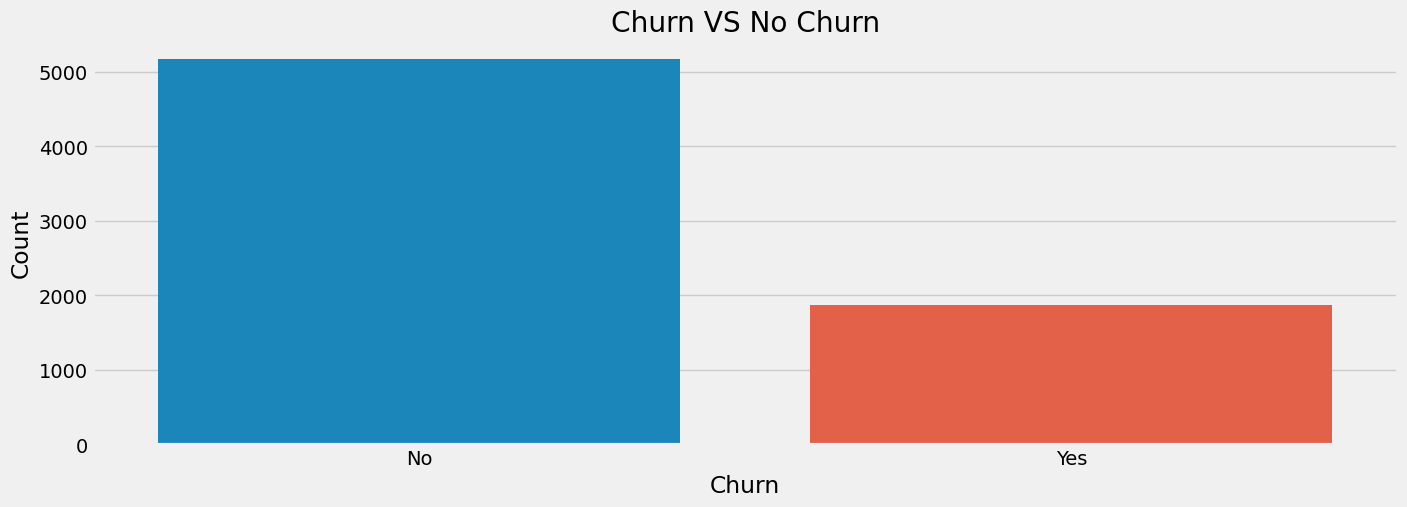

In [5]:

plt.figure(figsize=(15, 5))

sns.countplot(x='Churn', data=customers)
plt.title("Churn VS No Churn")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

From the plot,the total number of customers who churned, 5174 is more than the number of customers who did not churn, 1869.

In [6]:
# Analyze the gender of customers

customers["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

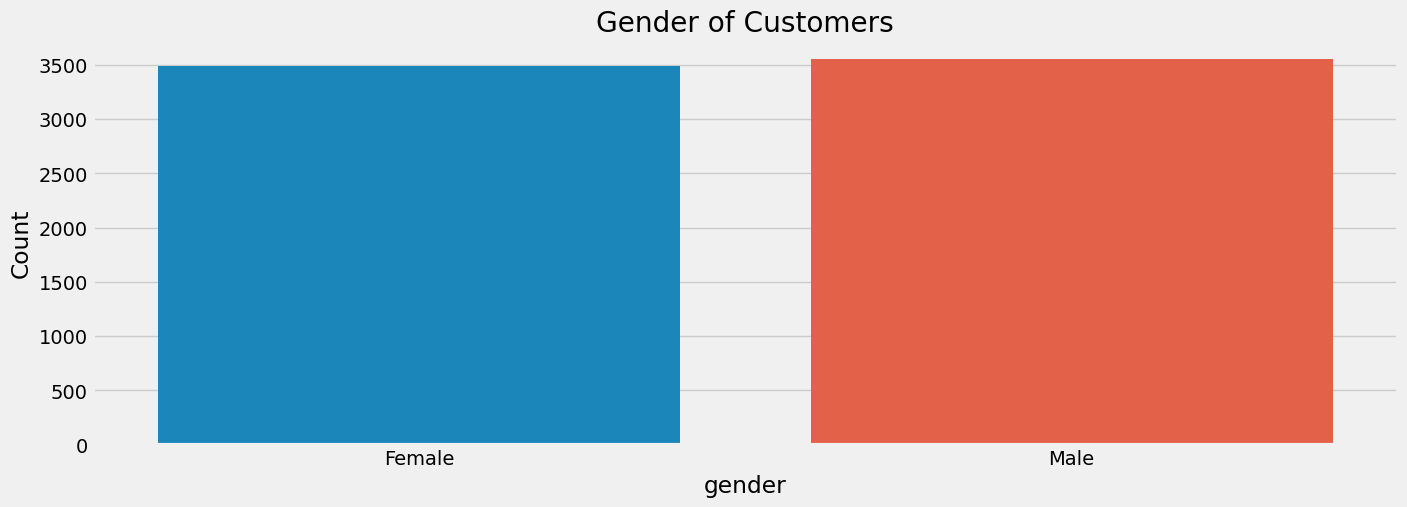

In [7]:

plt.figure(figsize=(15, 5))

sns.countplot(x='gender', data=customers)
plt.title("Gender of Customers")
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

From the plot, Female Customers were 3488, whereas Male Customers were 3555

In [8]:
# Analyze Customers who have partners and those who do not

customers["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

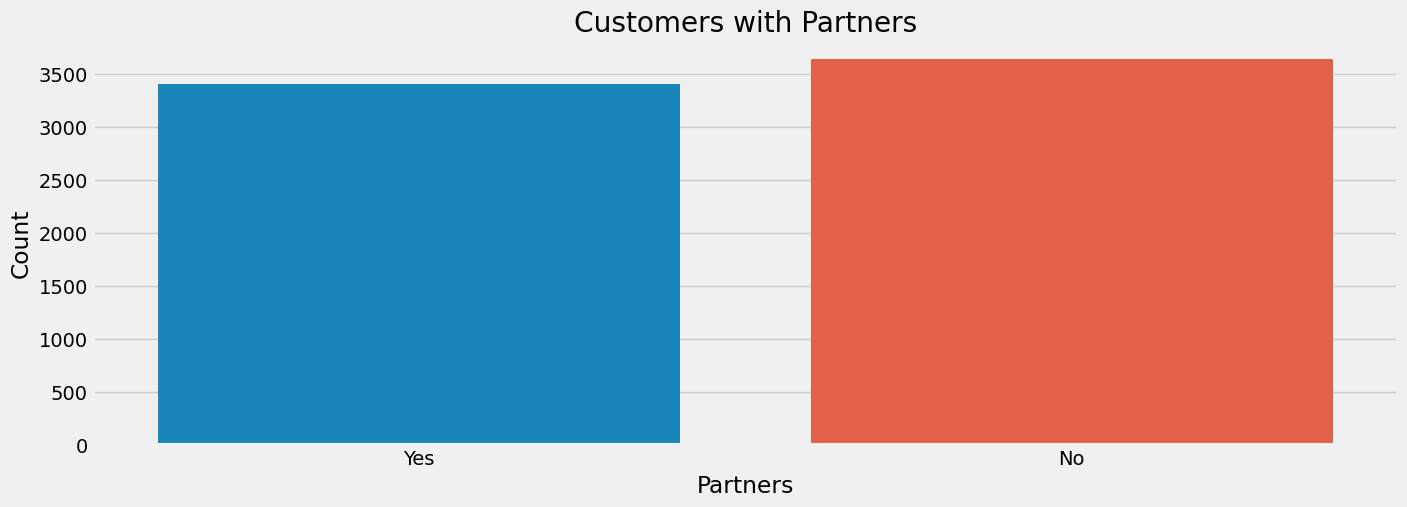

In [9]:
plt.figure(figsize=(15, 5))

sns.countplot(x='Partner', data=customers)
plt.title("Customers with Partners")
plt.xlabel('Partners')
plt.ylabel('Count')
plt.show()

From the graph, 3641 customers have no partners whereas 3402 customers have partners.

In [10]:
# Analyze whether customers have Phone Service or not

customers["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

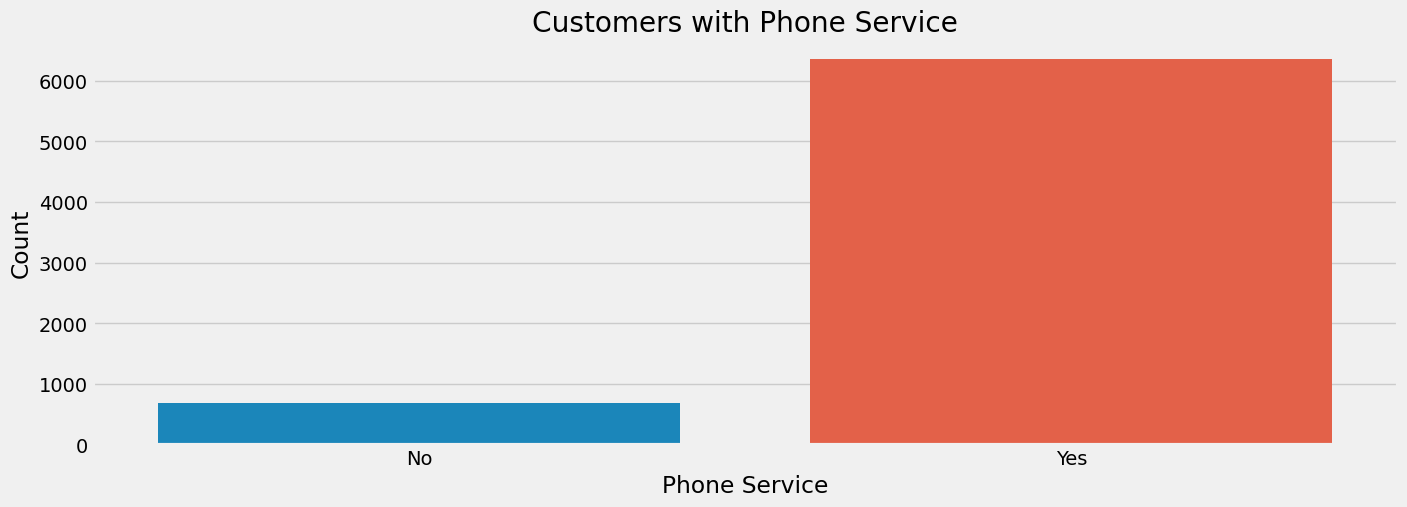

In [11]:
plt.figure(figsize=(15, 5))

sns.countplot(x='PhoneService', data=customers)
plt.title("Customers with Phone Service")
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

From the plot, 6361 customers had Phone Service, whereas 682 customers had no Phone Service.

In [15]:
# Analyze customers with Multiple Lines

customers["MultipleLines"].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

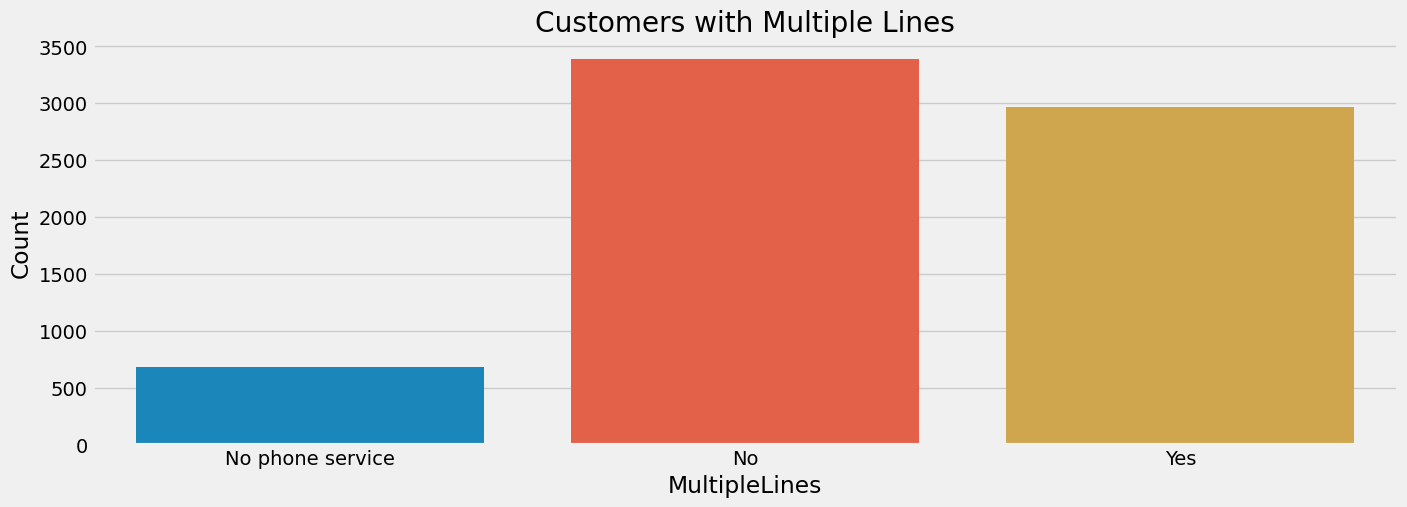

In [16]:
plt.figure(figsize=(15, 5))

sns.countplot(x='MultipleLines', data=customers)
plt.title("Customers with Multiple Lines")
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.show()

From the plot, 2971 customers had Multiple Lines, 3390 customers had single lines and 682 had no phone service at all.    

In [17]:
# Analyzing customers with Internet Service

customers["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

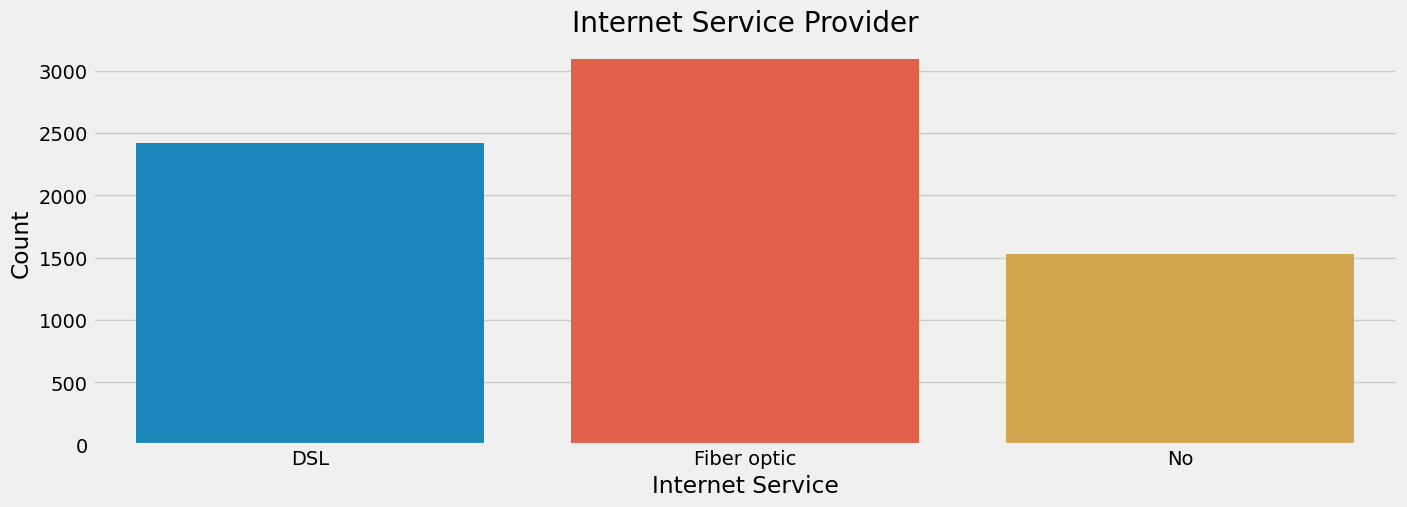

In [18]:
plt.figure(figsize=(15, 5))

sns.countplot(x='InternetService', data=customers)
plt.title("Internet Service Provider")
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

The graph shows that 3096 customers used Fiber optic  as their source of internet, 2421 customers used DSL as their internet provider and 1526 had no internet service provider and plan 

In [19]:
# Analyzing whether a customers has Online Security

customers["OnlineSecurity"].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

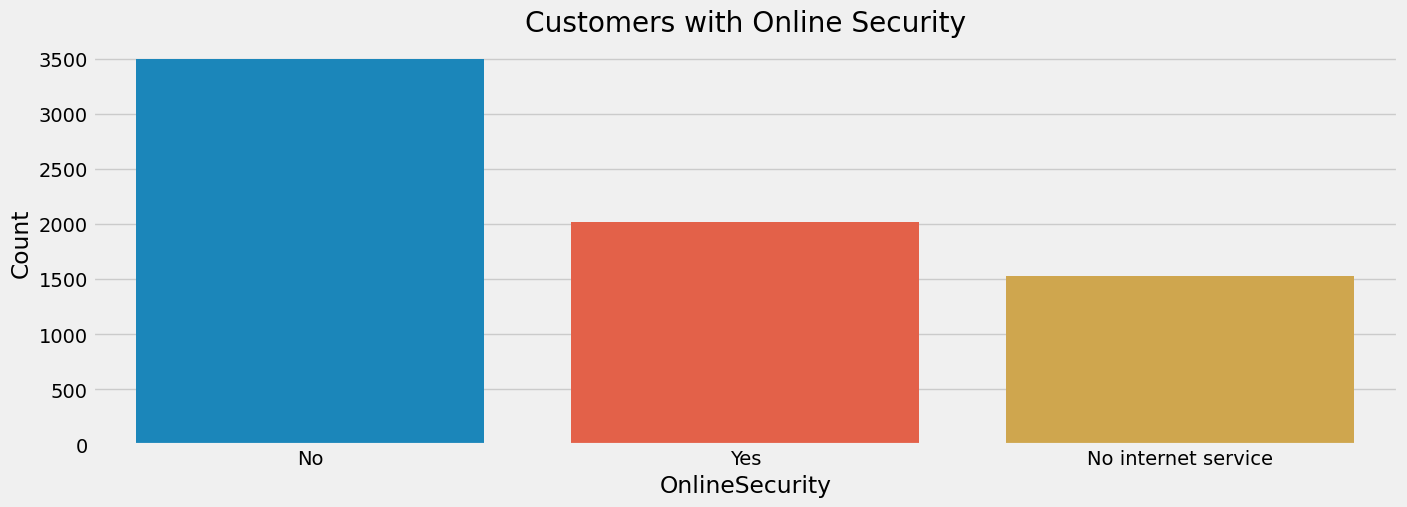

In [20]:
plt.figure(figsize=(15, 5))

sns.countplot(x='OnlineSecurity', data=customers)
plt.title("Customers with Online Security")
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.show()

The plot shoew that 2019 had online security, 3498 had no online security and 1526 had no internet service.

In [21]:
# Analyze Customers with backup

customers["OnlineBackup"].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

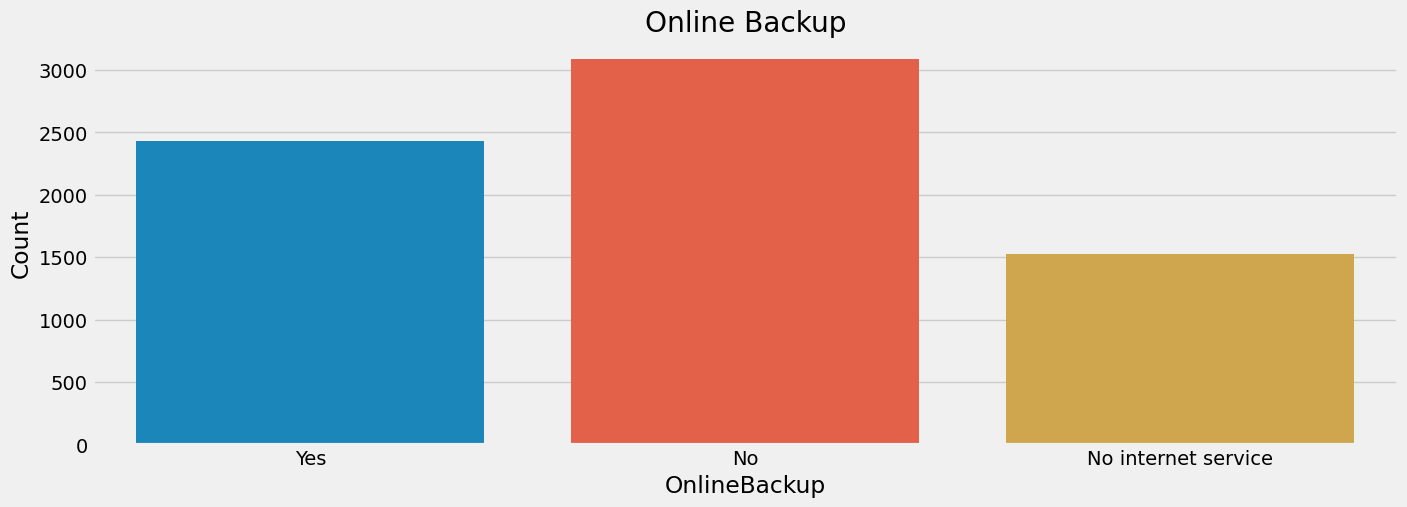

In [24]:
plt.figure(figsize=(15, 5))

sns.countplot(x='OnlineBackup', data=customers)
plt.title('Online Backup')
plt.ylabel('Count')
plt.show()

The graph shows that 3088 had no online backup,  2429 had online backup and 1526 had no internet service.   

In [25]:
# Analyze customers with Device Protection

customers["DeviceProtection"].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

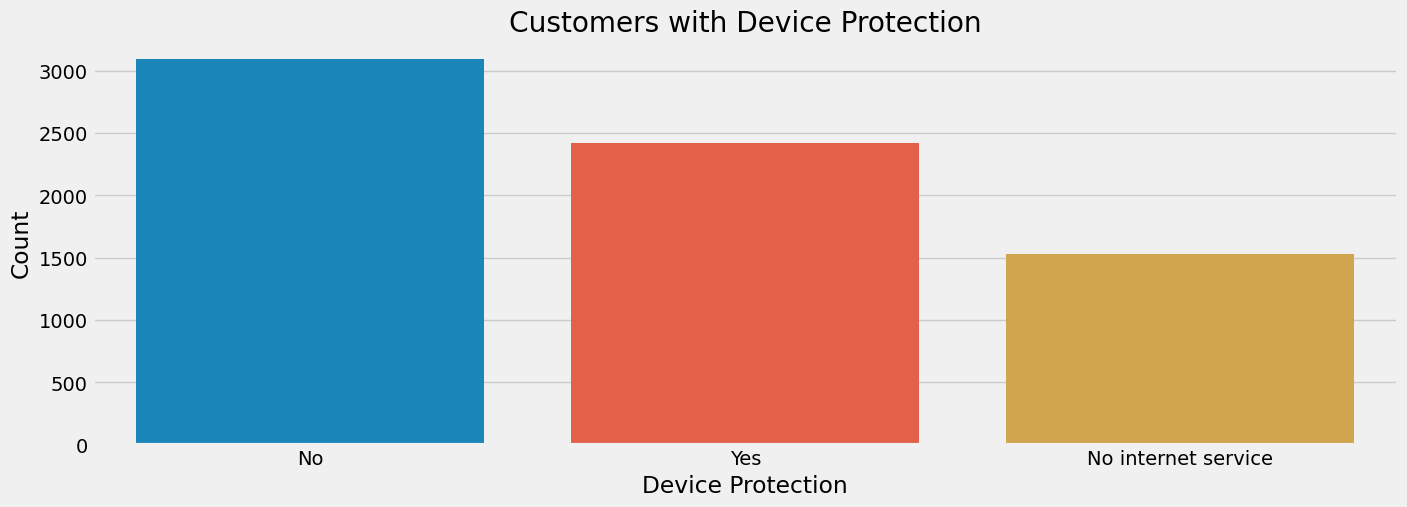

In [26]:
plt.figure(figsize=(15, 5))

sns.countplot(x='DeviceProtection', data=customers)
plt.title("Customers with Device Protection")
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()


The plot shows that 3095 customers had no device protection, 2422 had device protection and 1526 had no internet service

In [27]:
# Analyze customers with Tech Support

customers["TechSupport"].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

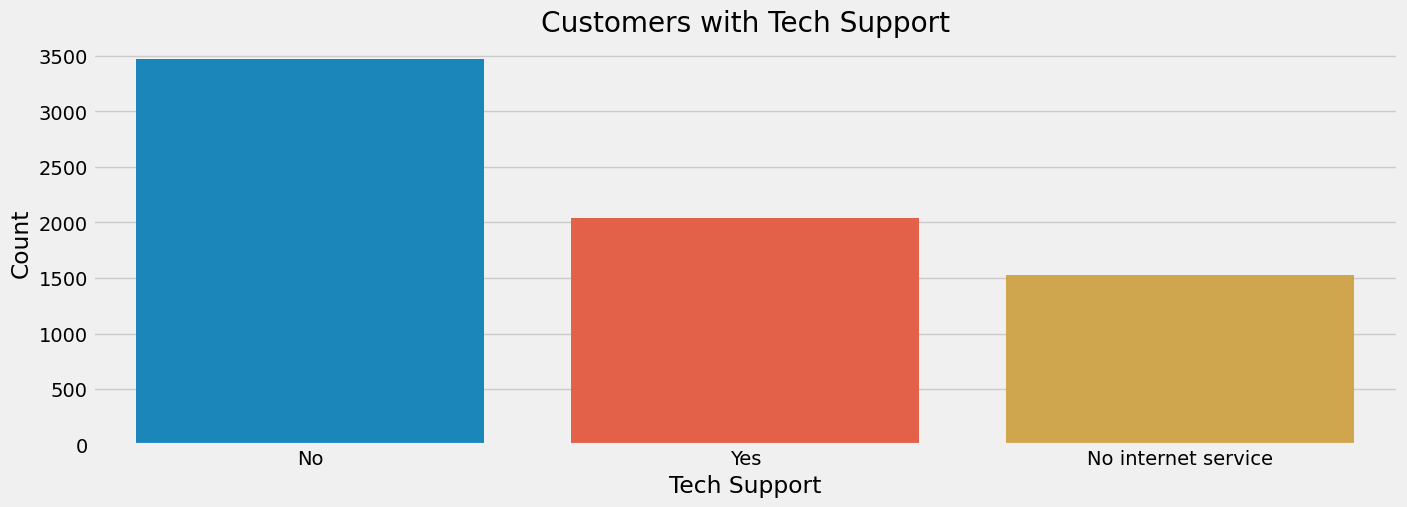

In [28]:
plt.figure(figsize=(15, 5))

sns.countplot(x='TechSupport', data=customers)
plt.title("Customers with Tech Support")
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

The plot shows that 3473 customers had no access to technical support, 2044 customers had access to technical support and 1526 had no internet service

In [29]:
# Analyze Customers with Streaming TV

customers["StreamingTV"].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

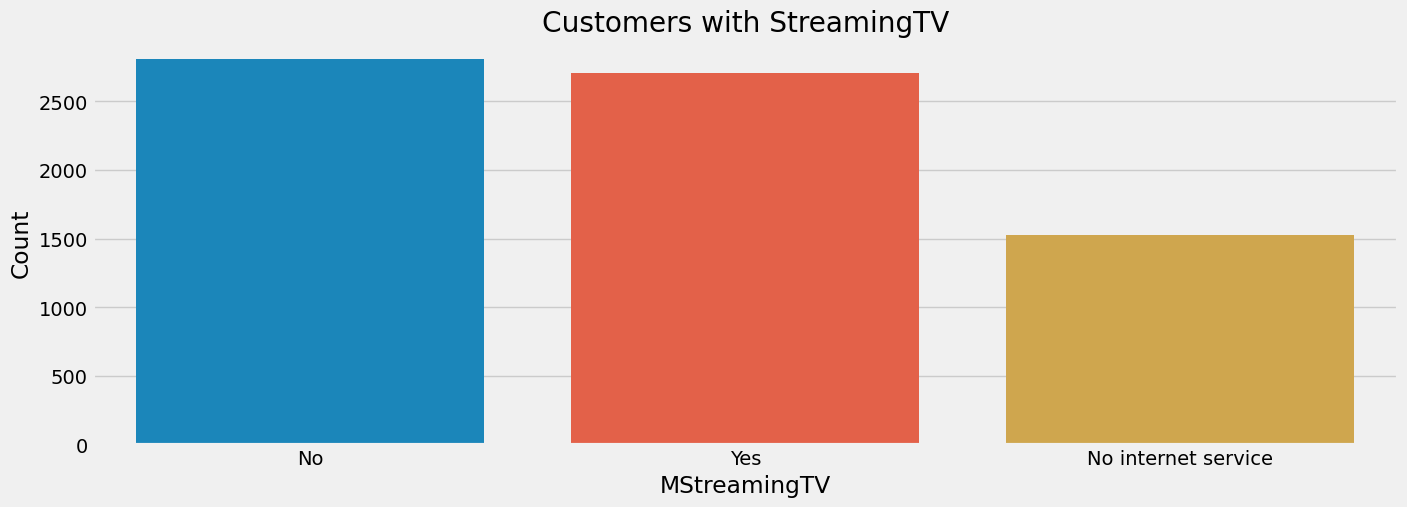

In [30]:
plt.figure(figsize=(15, 5))

sns.countplot(x='StreamingTV', data=customers)
plt.title("Customers with StreamingTV")
plt.xlabel('MStreamingTV')
plt.ylabel('Count')
plt.show()

There were 2810 customers who did not subscribe to StreamingTV, 2707 of our customers subscribed to StreamingTv and there were 1526 customers who had no internet service

In [31]:
# Analyze the Contract of customers

customers["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

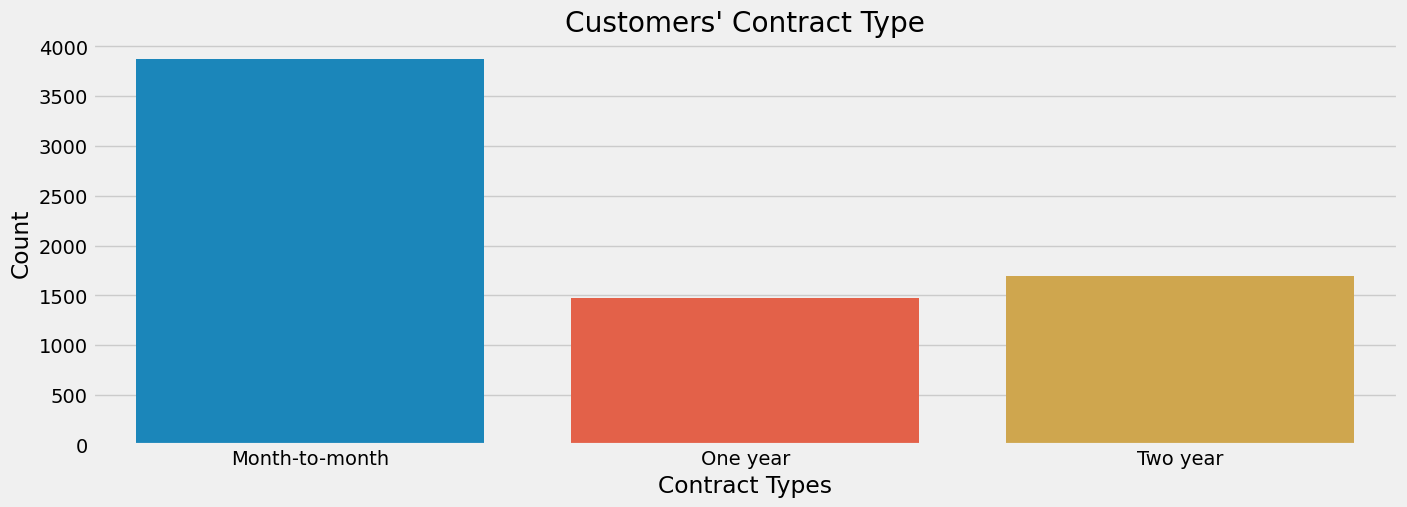

In [32]:
plt.figure(figsize=(15, 5))

sns.countplot(x='Contract', data=customers)
plt.title("Customers' Contract Type")
plt.xlabel('Contract Types')
plt.ylabel('Count')
plt.show()

The graph shows that 3875 customers subscribed to month-to-month contract, 1695 subscribed to two year contract and 1473 customers subscribed to one year contract.

In [33]:
# Analyzing the Pay Methods of Customers
customers["PaymentMethod"].value_counts()


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

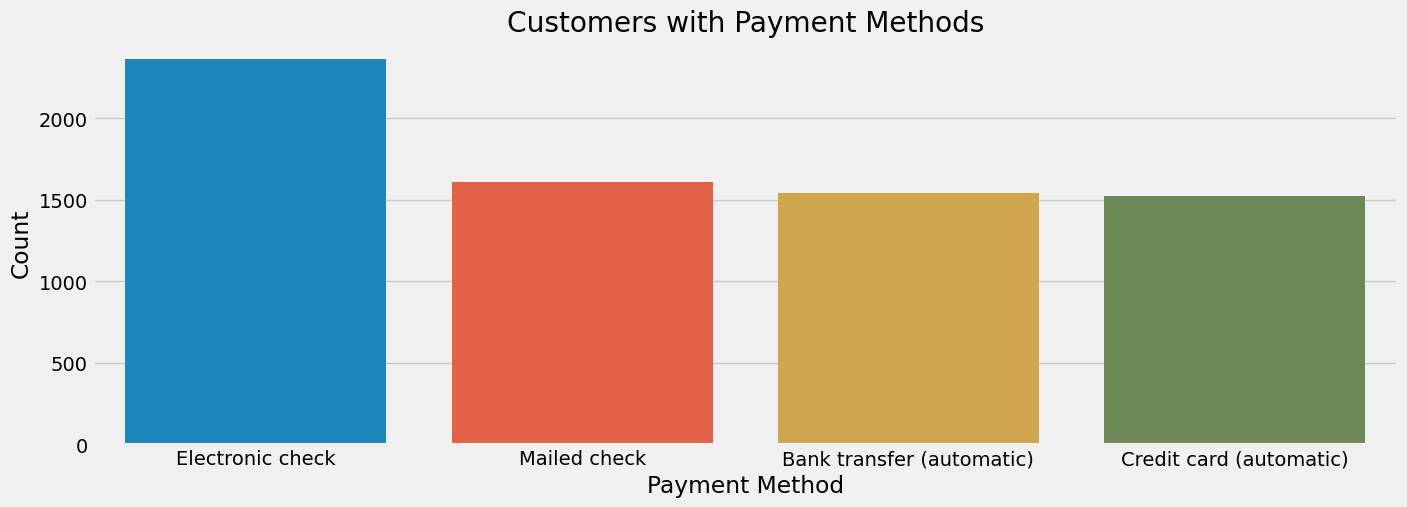

In [34]:
plt.figure(figsize=(15, 5))

sns.countplot(x='PaymentMethod', data=customers)
plt.title("Customers with Payment Methods")
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


2365 customers paid through Electronic check, 1612 paid through Mailed Check, 1544 paid through Bank transfer and 1522 paid through Credit cards

### BIVARIATE ANALYSIS

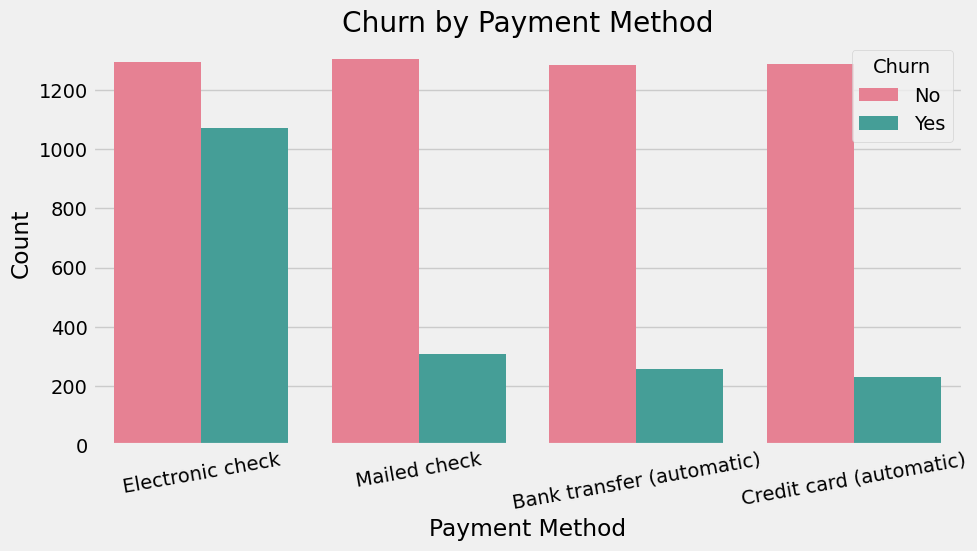

In [42]:
# Analyzing Churn by Payment Methods

plt.figure(figsize=(10,5))

sns.countplot(x='PaymentMethod', hue='Churn', data=customers, palette='husl')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

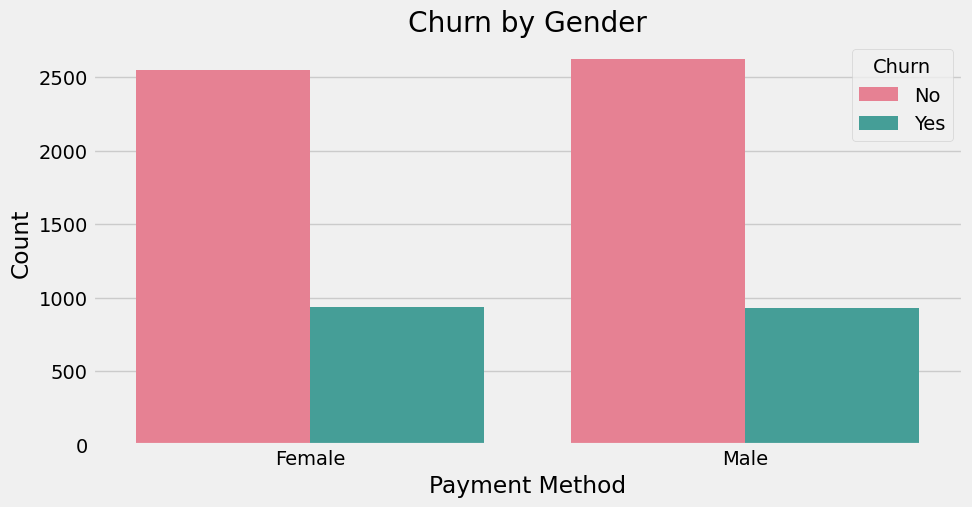

In [43]:
# Analyze gender by churn

plt.figure(figsize=(10,5))

sns.countplot(x='gender', hue='Churn', data=customers, palette='husl')
plt.title('Churn by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
#plt.xticks(rotation=10)

plt.show()

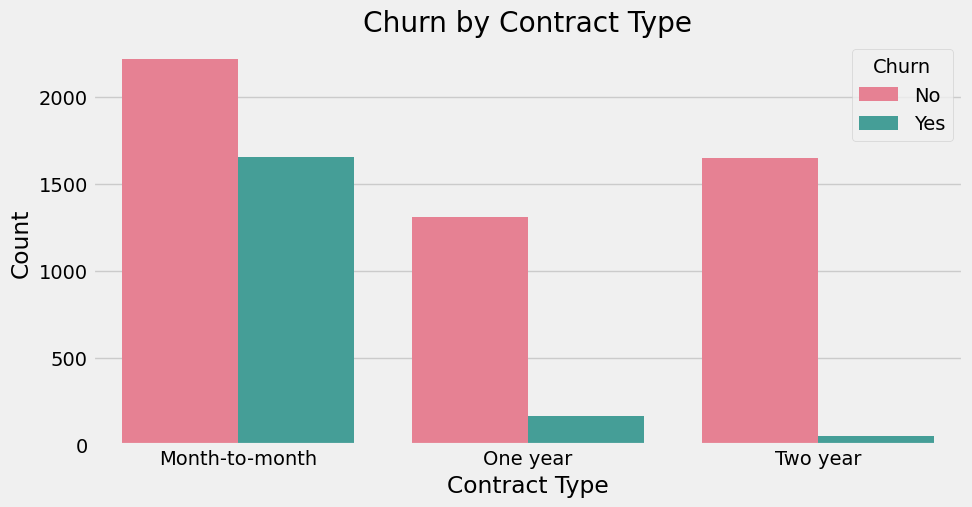

In [45]:
# Analyze Churn by contrat type

plt.figure(figsize=(10,5))

sns.countplot(x='Contract', hue='Churn', data=customers, palette='husl')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')

plt.show()

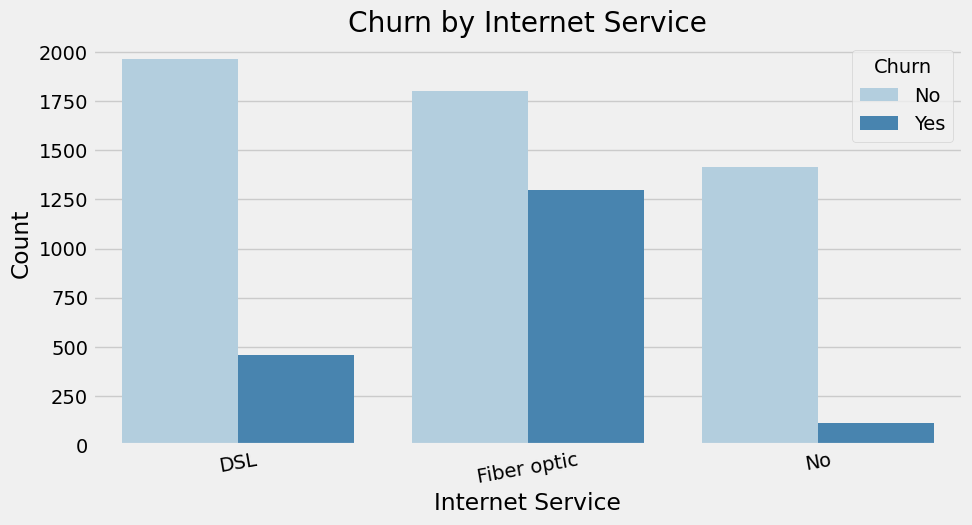

In [46]:
# Churn by Internet Service

plt.figure(figsize=(10,5))

sns.countplot(x='InternetService', hue='Churn', data=customers, palette='Blues')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

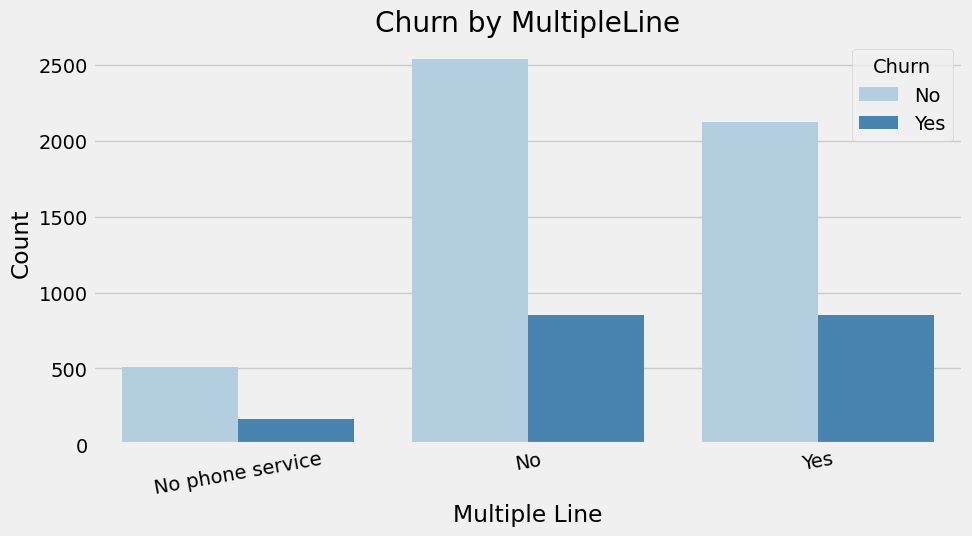

In [48]:
# Churn by Multiple Lines

plt.figure(figsize=(10,5))

sns.countplot(x='MultipleLines', hue='Churn', data=customers, palette='Blues')
plt.title('Churn by MultipleLine')
plt.xlabel('Multiple Line')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

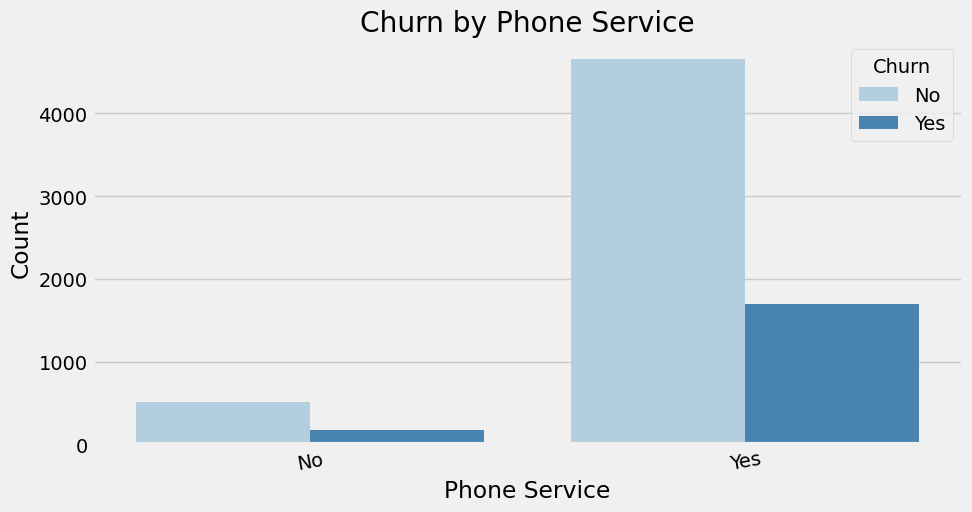

In [49]:
# Churn by Phone Service

plt.figure(figsize=(10,5))

sns.countplot(x='PhoneService', hue='Churn', data=customers, palette='Blues')
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

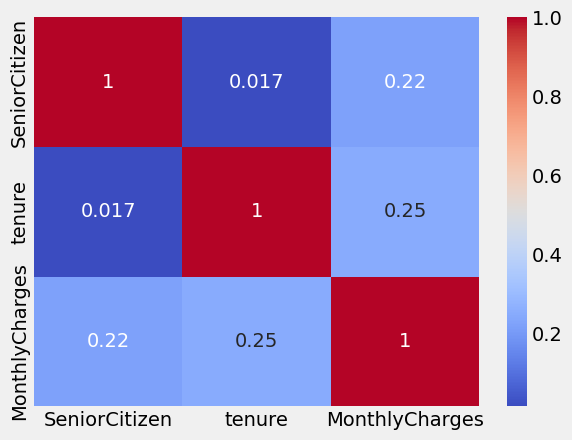

In [4]:
# Create correlation matrix
customers_copy = customers.drop("customerID", axis=1)


corr = customers_copy.corr(numeric_only=True)
corr = customers_copy.corr()

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');

### BUSINESS QUESTIONS

### Feature Processing & Engineering

In [3]:
# Replace blank spaces with NaN values
customers['TotalCharges'] = customers['TotalCharges'].replace(' ', np.nan)

# Fill NaN values with a default value (e.g. 0)
customers['TotalCharges'] = customers['TotalCharges'].fillna(0)

# Convert column to float
customers['TotalCharges'] = customers['TotalCharges'].astype(float)

In [4]:
## feature creations

customers['TenureInYears'] = customers['tenure'] // 12
customers['TotalCharges'] = customers['TotalCharges'].astype(float)
customers['ElectronicPayment'] = customers['PaymentMethod'].apply(lambda x: 1 if 'Electronic' in x else 0)
customers['num_services'] = customers[['PhoneService', 'InternetService']].sum(axis=1)
customers['has_fiber_optic'] = np.where(customers['InternetService'] == 'Fiber optic', 1, 0)
customers['is_month_to_month'] = (customers['Contract'] == 'Month-to-month')

In [5]:
# check sample of data

customers.sample(5, random_state=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureInYears,ElectronicPayment,num_services,has_fiber_optic,is_month_to_month
3381,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Bank transfer (automatic),79.85,3320.75,No,3,0,YesDSL,0,False
6180,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Bank transfer (automatic),102.40,6471.85,No,5,0,YesFiber optic,1,False
4829,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,Yes,Bank transfer (automatic),45.00,524.35,No,1,0,YesDSL,0,True
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,Yes,Mailed check,50.60,249.95,Yes,0,0,YesDSL,0,True
4249,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Mailed check,65.90,660.05,No,0,0,YesDSL,0,False


In [6]:
# Drop column that will not be required for model building

customers = customers.drop("customerID", axis=1)

### Dataset Splitting

In [7]:
# Create target feature and predicting feature
y = customers['Churn']
X = customers.drop('Churn', axis=1)

In [8]:
# Split data into test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
### Impute missing figure

X_train.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
TenureInYears        0
ElectronicPayment    0
num_services         0
has_fiber_optic      0
is_month_to_month    0
dtype: int64

### New Features Creation

In [10]:
X_train['total_charges_per_month'] = X_train['TotalCharges'] / X_train['tenure']
X_test['total_charges_per_month'] = X_test['TotalCharges'] / X_test['tenure']

### Features Encoding

In [11]:
#Impute missing values with mode
X_train = X_train.fillna(X_train.mode().iloc[0])
X_test = X_test.fillna(X_test.mode().iloc[0])

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on X_train
le = LabelEncoder()
X_train =X_train.apply(le.fit_transform)


# Perform label encoding on X_test
le = LabelEncoder()
X_test =X_test.apply(le.fit_transform)

# Perform label encoding on y_train and y_test
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [12]:
#  Check head of X_test

X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureInYears,ElectronicPayment,num_services,has_fiber_optic,is_month_to_month,total_charges_per_month
437,1,0,1,1,72,1,2,1,2,2,...,1,1,799,1375,6,0,2,1,0,1375
2280,0,1,0,0,8,1,2,1,0,0,...,1,1,682,528,0,0,2,1,1,1357
2235,0,0,1,1,41,1,2,0,2,2,...,1,1,448,993,3,0,1,0,0,840
4460,1,0,1,0,18,1,0,1,0,0,...,0,2,446,704,1,1,2,1,1,909
3761,0,0,1,0,72,1,2,0,2,2,...,1,1,497,1238,6,0,1,0,0,914


In [13]:
# Check head of X_train

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureInYears,ElectronicPayment,num_services,has_fiber_optic,is_month_to_month,total_charges_per_month
3738,1,0,0,0,35,0,1,0,0,0,...,0,2,339,2773,2,1,0,0,1,1591
3151,1,0,1,1,15,1,0,1,2,0,...,0,3,759,2212,1,0,2,1,1,2969
4860,1,0,1,1,13,0,1,0,2,2,...,0,3,237,1449,1,0,0,0,0,1485
3867,0,0,1,0,26,1,0,0,0,2,...,1,1,727,2944,2,0,1,0,0,2738
3810,1,0,1,1,1,1,0,0,0,0,...,0,2,278,116,0,1,1,0,1,1440


In [14]:
# Check  y_test

y_test_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# Check y_train

y_train_encoded

array([0, 0, 0, ..., 1, 0, 0])

### Features Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on the training data
scaler.fit(X_train)

# Apply the scaler transform to both the training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train set Balancing

In [17]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [20]:
# Check sample of X_train

X_train_resampled.sample(5, random_state=3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureInYears,ElectronicPayment,num_services,has_fiber_optic,is_month_to_month,total_charges_per_month
7321,1,0,0,0,24,1,0,1,0,0,...,1,2,1137,3066,2,1,2,1,1,3798
5585,0,0,1,1,71,1,0,0,2,0,...,0,1,798,4546,5,0,1,0,0,3081
5140,0,0,0,0,72,1,2,1,0,2,...,1,0,1411,5213,6,0,2,1,0,5168
2023,1,1,1,0,71,1,0,0,2,2,...,1,0,692,4359,5,0,1,0,0,2574
1763,1,0,1,1,19,1,0,0,2,0,...,1,0,334,1968,1,0,1,0,0,1661


In [22]:
# Check sample of y_train

y_train.sample(5, random_state=4)

6279     No
6936    Yes
563      No
1500     No
5478     No
Name: Churn, dtype: object

## Metrics we would use for assesments

1. Confusion matrix: This presents a table that compares the predicted values with the actual values to determine the true and false predictions.

2. Accuracy score: This measures the overall accuracy of the model for both the training and testing datasets.

3. Precision-Recall Curve: This illustrates the diagnostic ability of the model by examining false positive rate (FPR) and false negative rate (FNR) at different thresholds of class predictions. This metric is suitable for datasets with imbalanced classes as it is not reliant on the number of true negatives.

4. F1 Score: This metric calculates the harmonic mean of precision and recall to determine the balance between both metrics.

## Building and Training Machine Learning Models

### K Nearest Neighbors

In [24]:
#Import Model
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training dataset
knn.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = knn.predict(X_test)

[[970  65]
 [280  94]]
              precision    recall  f1-score   support

          No       0.78      0.94      0.85      1035
         Yes       0.59      0.25      0.35       374

    accuracy                           0.76      1409
   macro avg       0.68      0.59      0.60      1409
weighted avg       0.73      0.76      0.72      1409



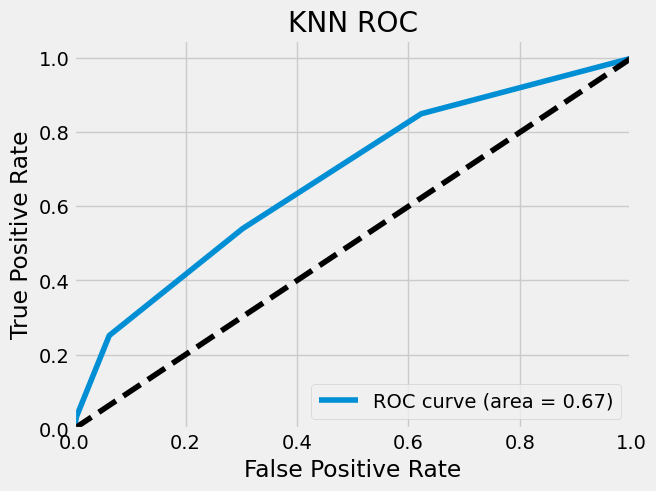

Accuracy score: 0.7551454932576295


In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# ROC Curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.show()

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)


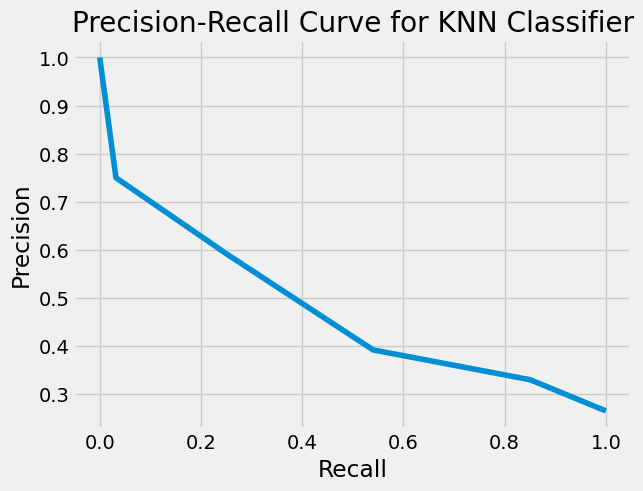

In [30]:
# Get the predicted probabilities for the positive class
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label='Yes')

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN Classifier')
plt.show()


### KNN METRICS EVALUATION

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred, pos_label='Yes')

# Calculate the recall score
recall = recall_score(y_test, y_pred, pos_label='Yes')

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, pos_label='No')


# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 0.76
Precision: 0.59
Recall: 0.25
F1-score: 0.85


### LOGISTIC REGRESSION

In [32]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureInYears,ElectronicPayment,num_services,has_fiber_optic,is_month_to_month,total_charges_per_month
3738,1,0,0,0,35,0,1,0,0,0,...,0,2,339,2773,2,1,0,0,1,1591
3151,1,0,1,1,15,1,0,1,2,0,...,0,3,759,2212,1,0,2,1,1,2969
4860,1,0,1,1,13,0,1,0,2,2,...,0,3,237,1449,1,0,0,0,0,1485
3867,0,0,1,0,26,1,0,0,0,2,...,1,1,727,2944,2,0,1,0,0,2738
3810,1,0,1,1,1,1,0,0,0,0,...,0,2,278,116,0,1,1,0,1,1440


In [33]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureInYears,ElectronicPayment,num_services,has_fiber_optic,is_month_to_month,total_charges_per_month
437,1,0,1,1,72,1,2,1,2,2,...,1,1,799,1375,6,0,2,1,0,1375
2280,0,1,0,0,8,1,2,1,0,0,...,1,1,682,528,0,0,2,1,1,1357
2235,0,0,1,1,41,1,2,0,2,2,...,1,1,448,993,3,0,1,0,0,840
4460,1,0,1,0,18,1,0,1,0,0,...,0,2,446,704,1,1,2,1,1,909
3761,0,0,1,0,72,1,2,0,2,2,...,1,1,497,1238,6,0,1,0,0,914


In [35]:
# Import Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

[[844 191]
 [136 238]]
              precision    recall  f1-score   support

          No       0.86      0.82      0.84      1035
         Yes       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



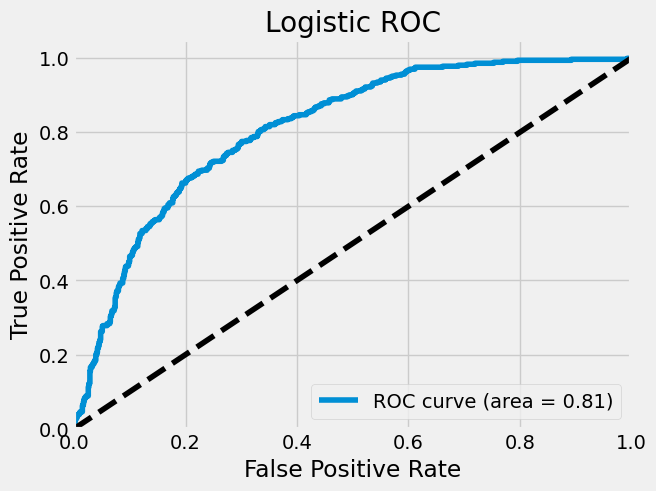

Accuracy score: 0.7679205110007097
Average precision score: 0.57


In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred_logreg)
print(cr)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob[:, 1], pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_logreg_prob[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic ROC')
plt.legend(loc="lower right")
plt.show()


# Accuracy score
acc = accuracy_score(y_test, y_pred_logreg)
print('Accuracy score:', acc)

#Average Precision score
average_precision = average_precision_score(y_test, y_pred_logreg_prob[:, 1], pos_label="Yes")
print("Average precision score: {:.2f}".format(average_precision))



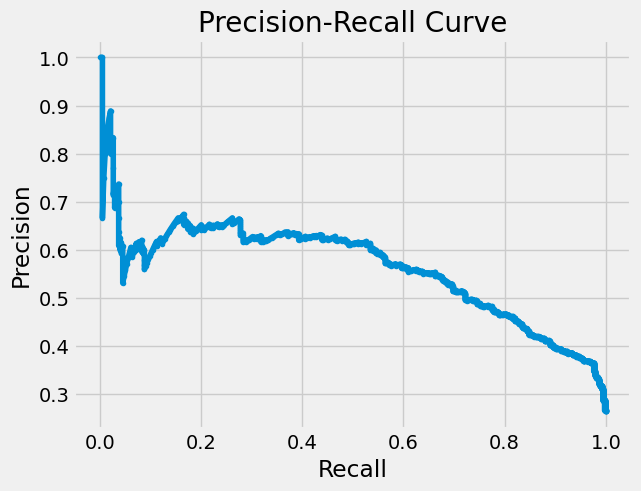

In [40]:
#plotting precision 
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_logreg_prob[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Logistic Regression Model evaluation results

In [41]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)

# Calculate the precision
precision = precision_score(y_test, y_pred_logreg, pos_label='Yes')

# Calculate the recall
recall = recall_score(y_test, y_pred_logreg, pos_label='Yes')

# Calculate the F1-score
f1 = f1_score(y_test, y_pred_logreg, pos_label='Yes')

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.77
Precision: 0.55
Recall: 0.64
F1-score: 0.59


### GRADIENT BOOSTING MACHINES (GBM)

In [43]:
# Import Model
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier with default hyperparameters
gbm = GradientBoostingClassifier()
# Fit the GBM model on the training dataset
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
# Make predictions on the test dataset
y_pred = gbm.predict(X_test)

In [45]:
# Calculate the accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.7963094393186657


[[928 107]
 [180 194]]
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.64      0.52      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



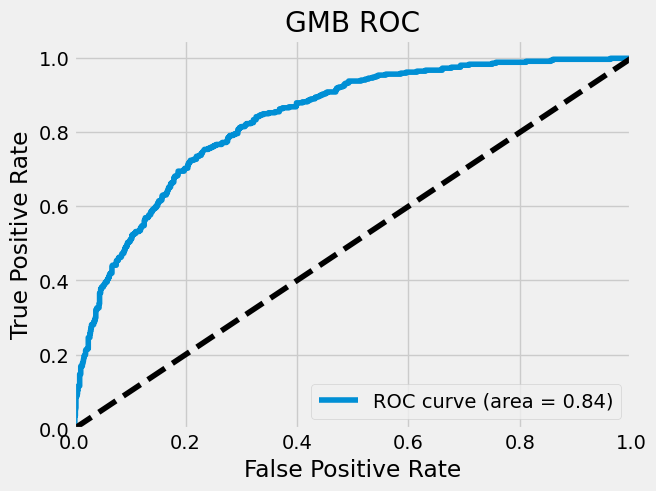

Accuracy score: 0.7963094393186657


In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# ROC Curve
y_pred_prob = gbm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GMB ROC')
plt.legend(loc="lower right")
plt.show()

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)

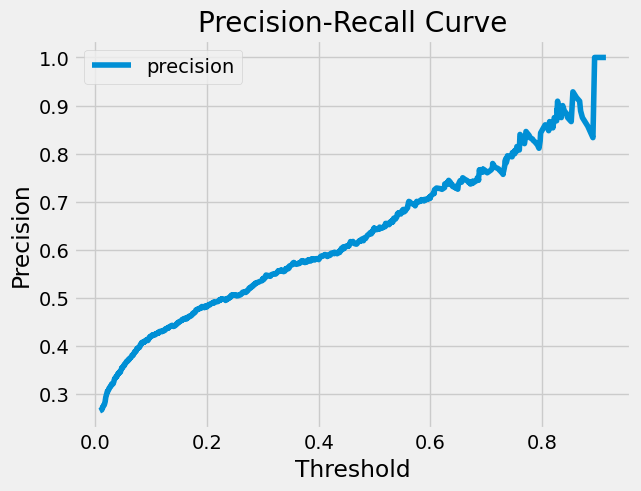

In [47]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities of the positive class
y_prob = gbm.predict_proba(X_test)[:, 1]

# Convert the target variable to binary labels
y_test_bin = (y_test == "Yes").astype(int)

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_prob)

# Plot the precision score as a function of the threshold
plt.plot(thresholds, precision[:-1], label="precision")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### GBM Model evaluation Results

In [48]:
# Calculate the accuracy of the GBM classifier
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the GBM classifier
precision = precision_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the recall of the GBM classifier
recall = recall_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the f1-score of the GBM classifier
f1_score = f1_score(y_test, y_pred, labels=['Yes'], pos_label='Yes', average='weighted')
# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 0.80
Precision: 0.64
Recall: 0.52
F1-score: 0.59


### NEURAL NETWORKS

In [50]:
# Import Model
from sklearn.neural_network import MLPClassifier

# Define the MLP classifier with 1 hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)



In [51]:
# Fit the MLP model on the training dataset
mlp.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = mlp.predict(X_test)

[[980  55]
 [254 120]]
              precision    recall  f1-score   support

          No       0.79      0.95      0.86      1035
         Yes       0.69      0.32      0.44       374

    accuracy                           0.78      1409
   macro avg       0.74      0.63      0.65      1409
weighted avg       0.77      0.78      0.75      1409



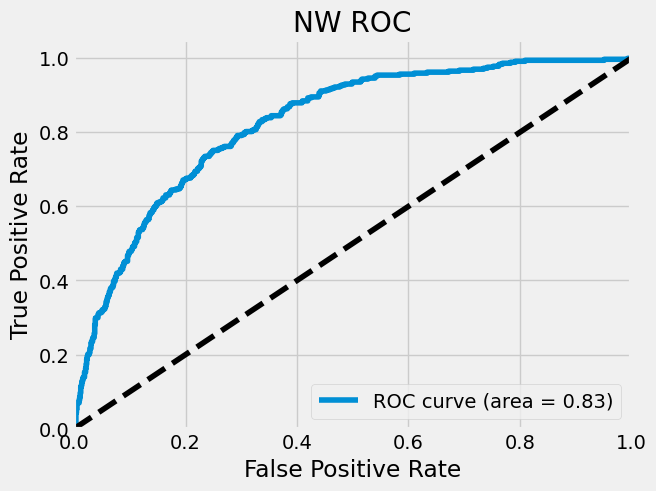

In [52]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# ROC Curve
y_pred_prob = mlp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NW ROC')
plt.legend(loc="lower right")
plt.show()

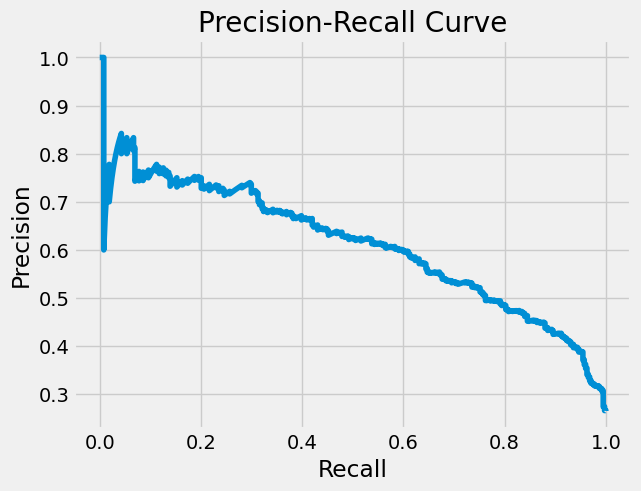

In [53]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Yes' as 1 and 'No' as 0 in y_test
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Predict probabilities and obtain positive class probabilities
y_prob = mlp.predict_proba(X_test)[:, 1]

# Compute precision, recall and threshold values
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



### Calculating the Evaluation metrics for Neural Networks

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy of the MLP classifier
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the MLP classifier
precision = precision_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the recall of the MLP classifier
recall = recall_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the f1-score of the MLP classifier
f1 = f1_score(y_test, y_pred, labels=['Yes'], pos_label='Yes', average='weighted')

# Print the scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7806955287437899
Precision: 0.6857142857142857
Recall: 0.32085561497326204
F1-score: 0.4371584699453552


### Comparing Model scores

In [55]:
# Create a dictionary with the evaluation metrics
data = {'KNN': [0.76, 0.59, 0.25, 0.85],
        'Logistic Regression': [0.77, 0.56, 0.63, 0.59],
        'Gradient Boosting Machines': [0.80, 0.64, 0.52, 0.59],
        'Neural Networks': [0.7480482611781405, 0.7435897435897435, 0.07754010695187166, 0.1404358353510896]}

# Create a DataFrame from the dictionary
customers = pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Sort the DataFrame in ascending order
customers_sorted = customers.T.sort_values(by='F1-score', ascending=True)

print(customers_sorted)


                            Accuracy  Precision   Recall  F1-score
Neural Networks             0.748048    0.74359  0.07754  0.140436
Logistic Regression         0.770000    0.56000  0.63000  0.590000
Gradient Boosting Machines  0.800000    0.64000  0.52000  0.590000
KNN                         0.760000    0.59000  0.25000  0.850000


### Conclusion Based on the four models choosen

Based on the evaluation metrics, the Gradient Boosting Machines model performed the best overall with an accuracy of 0.80. It also had a higher precision and F1-score compared to the KNN and Logistic Regression models. However, the recall for the Gradient Boosting Machines model was slightly lower than that of the Logistic Regression model.

The KNN model had the highest F1-score of 0.85, which suggests that it had the best balance between precision and recall. However, its recall was quite low at only 0.25.

The Logistic Regression model had the highest recall at 0.63, but its precision was lower than that of the KNN and Gradient Boosting Machines models, resulting in a lower F1-score.

The Neural Networks model had the highest precision at 0.74, but its recall was very low at only 0.08, resulting in a very low F1-score of 0.14.

### Building a model Interpreter for the GBM

In [56]:
# Initialize the GBM classifier with default hyperparameters
gbm = GradientBoostingClassifier()
# Fit the GBM model on the training dataset
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [57]:
# Making predictions on the test dataset
y_pred = gbm.predict(X_test)

# Feature Importance Analysis
feature_importance = gbm.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]

# Get the names of the features in the original order
sorted_features = X_train.columns[sorted_indices]

# Print the feature importance
for feature, importance in zip(sorted_features, sorted_feature_importance):
    print(f"{feature}: {importance}")

is_month_to_month: 0.28823303056392513
tenure: 0.1443603350799283
Contract: 0.09435271693530324
has_fiber_optic: 0.08329531087782013
TotalCharges: 0.07397774719638595
OnlineSecurity: 0.06891681154271675
total_charges_per_month: 0.05202161454933623
MonthlyCharges: 0.048763534997414495
TechSupport: 0.04344107741515805
ElectronicPayment: 0.03904507501869362
PaperlessBilling: 0.019049949338902313
MultipleLines: 0.009603030137014728
OnlineBackup: 0.009143790206240317
StreamingMovies: 0.006901048415761519
SeniorCitizen: 0.005223365766469709
PaymentMethod: 0.0036228024324554266
gender: 0.0027581683017825222
Dependents: 0.0021022416972466345
StreamingTV: 0.0015243073987615356
num_services: 0.0012210406279465718
DeviceProtection: 0.0010517828780723553
TenureInYears: 0.0005698401983558861
PhoneService: 0.0005032739724988939
Partner: 0.0003181044518097684
InternetService: 0.0


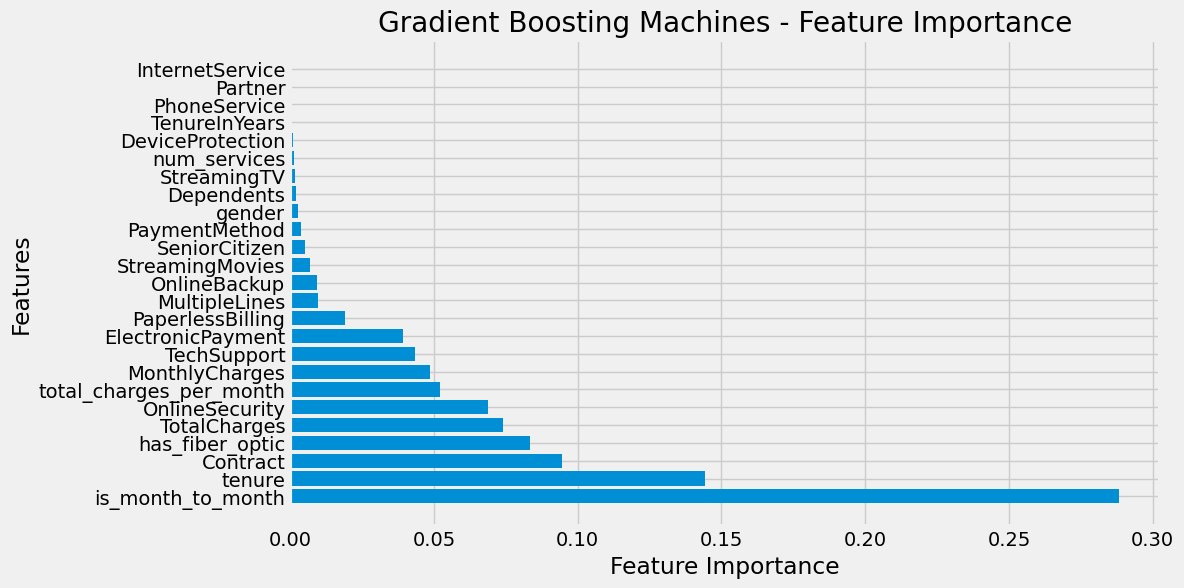

In [58]:
# Visualize Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Machines - Feature Importance')
plt.show()

### Insights on the interpreter

Contract (0.1988) and is_month_to_month (0.1837) are the two most important features. This suggests that the type of contract and whether the customer is on a month-to-month basis significantly influence the model's predictions. Customers with longer-term contracts may exhibit different behaviors or have different preferences compared to those on month-to-month contracts.

Tenure (0.1438) is another important feature. It indicates that the length of time the customer has been with the company plays a significant role in the model's predictions. This aligns with the common understanding that customer loyalty tends to increase with longer tenure.

Has_fiber_optic (0.0833) suggests that whether the customer has fiber optic internet service has a moderate impact on the predictions. It implies that this feature might be indicative of certain customer behaviors or preferences that influence their likelihood of churn or other outcomes.

TotalCharges (0.0748) and MonthlyCharges (0.0485) are important financial features. Total charges accumulated and monthly charges paid by the customer contribute to the model's predictions. Higher charges may correlate with different customer behaviors or affordability levels, affecting the likelihood of churn or other outcomes.

OnlineSecurity (0.0689), TechSupport (0.0434), OnlineBackup (0.0091), and DeviceProtection (0.0010) indicate that the presence or absence of these services plays a role in the model's predictions. Customers with these services may have different satisfaction levels, protection against issues, or overall experiences, influencing their likelihood of churn.

PaymentMethod, gender, and Dependents have relatively lower feature importances. This suggests that these factors have less influence on the model's predictions compared to other features.

